In [1]:
!python -V

Python 3.9.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
%matplotlib inline

In [3]:
n = 8921483 #number of records in file
s = int(n/100) #desired sample size
skiprows = sorted(random.sample(range(1, n), n-s))
df = pd.read_csv('../data/raw/train.csv.gz', compression='gzip', skiprows=skiprows)

C:\Users\marco\anaconda3\envs\capstone2env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [157]:
df.shape

(89214, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89214 entries, 0 to 89213
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  89214 non-null  object 
 1   ProductName                                        89214 non-null  object 
 2   EngineVersion                                      89214 non-null  object 
 3   AppVersion                                         89214 non-null  object 
 4   AvSigVersion                                       89214 non-null  object 
 5   IsBeta                                             89214 non-null  int64  
 6   RtpStateBitfield                                   88884 non-null  float64
 7   IsSxsPassiveMode                                   89214 non-null  int64  
 8   DefaultBrowsersIdentifier                          4340 non-null   float64
 9   AVProd

Features groups:
- machine specs
- geo
- app
- AV
- browser

In [5]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000c0e361386f06ef44a29291ccd941,win8defender,1.1.15100.1,4.9.10586.0,1.273.1416.0,0,7.0,0,NaN,12202.0,...,64793.0,1,NaN,0.0,0,0,0.0,0.0,6.0,1
1,0001183a6795968352a77fa7f2757510,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1435.0,0,7.0,0,NaN,53447.0,...,51066.0,0,NaN,0.0,0,0,0.0,1.0,15.0,1
2,00020f2195e8ad0c4778b604c11e13c5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.499.0,0,7.0,0,NaN,53447.0,...,7145.0,0,NaN,0.0,0,0,0.0,0.0,15.0,1
3,000395ddb22efa94133ce30e9e747976,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1826.0,0,7.0,0,NaN,53447.0,...,52458.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,00043933ab74b6d83e39d5939b20afa2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.368.0,0,7.0,0,NaN,53447.0,...,50319.0,0,NaN,0.0,0,0,0.0,1.0,8.0,0


In [43]:
round(df.HasDetections.mean(), 2), df.HasDetections.isnull().sum()

(0.5, 0)

In [29]:
missing_df = pd.concat([df.isnull().sum(), round(df.isnull().mean() * 100, 2)], axis=1)
missing_df.columns = ['missing_count', '%']
missing_df.sort_values(by='missing_count', ascending=False)[:15]

,missing_count,%
PuaMode,89194,99.98
Census_ProcessorClass,88843,99.58
DefaultBrowsersIdentifier,84874,95.14
Census_IsFlightingInternal,74121,83.08
Census_InternalBatteryType,63426,71.09
Census_ThresholdOptIn,56775,63.64
Census_IsWIMBootEnabled,56707,63.56
SmartScreen,31907,35.76
OrganizationIdentifier,27763,31.12
SMode,5218,5.85


In [44]:
missing_list = missing_df[missing_df['%']>40].index.tolist()
missing_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [45]:
df[missing_list].nunique()

DefaultBrowsersIdentifier     258
PuaMode                         1
Census_ProcessorClass           3
Census_InternalBatteryType     24
Census_IsFlightingInternal      1
Census_ThresholdOptIn           2
Census_IsWIMBootEnabled         1
dtype: int64

In [59]:
df = df.drop(missing_list, axis=1)

In [71]:
df.duplicated(keep=False).sum()

0

In [73]:
df['MachineIdentifier'].nunique()

89214

In [74]:
df = df.drop('MachineIdentifier', axis=1)

# Categorical Features

In [100]:
cat_col = df.select_dtypes('object').columns.tolist()
cat_col_df = df[cat_col] 
cat_col_df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,...,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,AvSigVersion_main
0,win8defender,1.1.15100.1,4.9.10586.0,1.273.1416.0,windows10,x64,10.0.0.0,th2,10586.306.amd64fre.th2_release_sec.160422-1850,Home,...,amd64,th2_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail,1.273
1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1435.0,windows10,x86,10.0.0.0,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,...,x86,rs4_release,Professional,PROFESSIONAL,Refresh,FullAuto,IS_GENUINE,Retail,Retail,1.275
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.499.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,INVALID_LICENSE,Retail,Retail,1.275
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1826.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,...,amd64,rs3_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,INVALID_LICENSE,Volume:GVLK,Retail,1.273
4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.368.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,amd64,rs4_release,Professional,PROFESSIONAL,Update,FullAuto,IS_GENUINE,OEM:DM,Retail,1.275


In [143]:
cat_col_df.describe().T

,count,unique,top,freq
ProductName,89214,2,win8defender,88291
EngineVersion,89214,42,1.1.15200.1,38717
AppVersion,89214,82,4.18.1807.18075,51571
AvSigVersion,89214,3809,1.273.1420.0,996
Platform,89214,4,windows10,86208
Processor,89214,3,x64,81162
OsVer,89214,5,10.0.0.0,86359
OsPlatformSubRelease,89214,9,rs4,39240
OsBuildLab,89214,340,17134.1.amd64fre.rs4_release.180410-1804,36707
SkuEdition,89214,8,Home,55112


In [154]:
cat_col_df.nunique().sort_values(ascending=False)

AvSigVersion                        3809
OsBuildLab                           340
Census_OSVersion                     248
AppVersion                            82
EngineVersion                         42
AvSigVersion_main                     31
Census_ChassisTypeName                26
Census_OSEdition                      21
Census_OSSkuName                      19
Census_OSBranch                       13
Census_MDC2FormFactor                 11
SmartScreen                           11
Census_OSInstallTypeName               9
OsPlatformSubRelease                   9
Census_PowerPlatformRoleName           9
SkuEdition                             8
Census_FlightRing                      7
Census_ActivationChannel               6
Census_OSWUAutoUpdateOptionsName       6
OsVer                                  5
Census_GenuineStateName                4
Census_PrimaryDiskTypeName             4
Platform                               4
Census_OSArchitecture                  3
Processor       

In [155]:
for col in cat_col:
    print(f'Feature: {col} \nValue counts:\n{df[col].value_counts()}\n\n')
    

Feature: ProductName 
Value count:
win8defender    88291
mse               923
Name: ProductName, dtype: int64


Feature: EngineVersion 
Value count:
1.1.15200.1    38717
1.1.15100.1    36624
1.1.15000.2     2657
1.1.14901.4     2099
1.1.14600.4     1541
1.1.14800.3     1392
1.1.15300.6     1160
1.1.14104.0      923
1.1.13504.0      705
1.1.15300.5      665
1.1.14700.5      487
1.1.14500.5      432
1.1.14405.2      381
1.1.14306.0      226
1.1.14202.0      174
1.1.14003.0      142
1.1.13903.0      109
1.1.13303.0       90
1.1.13804.0       88
1.1.13407.0       77
1.1.12902.0       65
1.1.13601.0       59
1.1.13701.0       57
1.1.13000.0       55
1.1.13704.0       49
1.1.13202.0       42
1.1.13103.0       38
1.1.14305.0       37
1.1.15000.1       29
1.1.14901.3       24
1.1.12805.0       19
1.1.14700.3       14
1.1.14800.1       14
1.1.14700.4        7
1.1.14201.0        4
1.1.14303.0        3
1.1.14103.0        2
1.1.14002.0        2
1.1.14500.2        2
1.1.13902.0        1
1.1.11701.

Feature: Census_OSInstallTypeName 
Value count:
UUPUpgrade        26118
IBSClean          16532
Update            15992
Upgrade           12302
Other              8447
Reset              6458
Refresh            2120
Clean               682
CleanPCRefresh      563
Name: Census_OSInstallTypeName, dtype: int64


Feature: Census_OSWUAutoUpdateOptionsName 
Value count:
FullAuto                                 39545
UNKNOWN                                  25251
Notify                                   20349
AutoInstallAndRebootAtMaintenanceTime     3630
Off                                        286
DownloadNotify                             153
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64


Feature: Census_GenuineStateName 
Value count:
IS_GENUINE         78827
INVALID_LICENSE     7981
OFFLINE             2263
UNKNOWN              143
Name: Census_GenuineStateName, dtype: int64


Feature: Census_ActivationChannel 
Value count:
Retail            47184
OEM:DM            34360
Volume:

AvSigVersion                        3809
OsBuildLab                           340
Census_OSVersion                     248
AppVersion                            82
EngineVersion                         42
AvSigVersion_main                     31
Census_ChassisTypeName                26
Census_OSEdition                      21
Census_OSSkuName                      19
Census_OSBranch                       13
Census_MDC2FormFactor                 11
SmartScreen                           11
Census_OSInstallTypeName               9
OsPlatformSubRelease                   9
Census_PowerPlatformRoleName           9
SkuEdition                             8
Census_FlightRing                      7
Census_ActivationChannel               6
Census_OSWUAutoUpdateOptionsName       6
OsVer                                  5
Census_GenuineStateName                4
Census_PrimaryDiskTypeName             4
Platform                               4
Census_OSArchitecture                  3
Processor       

In [139]:
df.AvSigVersion.value_counts()

1.273.1420.0    996
1.275.1140.0    981
1.263.48.0      959
1.275.727.0     948
1.273.1826.0    804
               ... 
1.247.480.0       1
1.253.403.0       1
1.263.183.0       1
1.247.666.0       1
1.235.149.0       1
Name: AvSigVersion, Length: 3809, dtype: int64

In [93]:
df['AvSigVersion_main'] = df.AvSigVersion.str[:5]
df['AvSigVersion_main']

0        1.273
1        1.275
2        1.275
3        1.273
4        1.275
         ...  
89209    1.275
89210    1.271
89211    1.273
89212    1.273
89213    1.275
Name: AvSigVersion_main, Length: 89214, dtype: object

In [141]:
df.AvSigVersion_main.unique()

array(['1.273', '1.275', '1.267', '1.259', '1.271', '1.263', '1.269',
       '1.277', '1.251', '1.265', '1.237', '1.227', '1.261', '1.253',
       '1.233', '1.239', '1.229', '1.241', '1.231', '1.257', '1.235',
       '1.243', '1.245', '1.249', '1.247', '1.225', '1.255', '1.223',
       '1.209', '1.221', '1.199'], dtype=object)

In [94]:
df['AvSigVersion_main'].nunique()

31

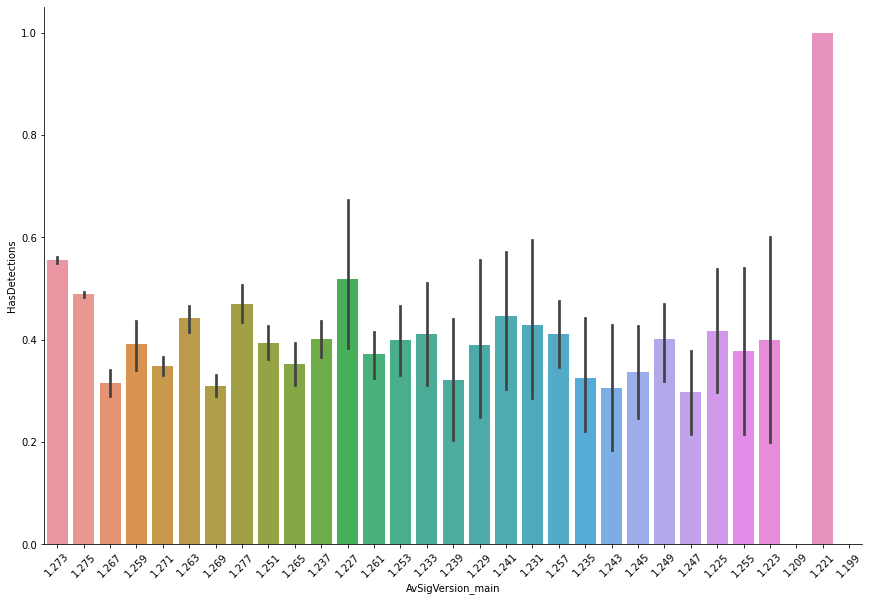

In [119]:
ax = sns.catplot(x='AvSigVersion_main', 
              y='HasDetections', 
              kind='bar',
              height=8, 
              aspect=1.5,
              data=df)
ax.set_xticklabels(rotation=45)

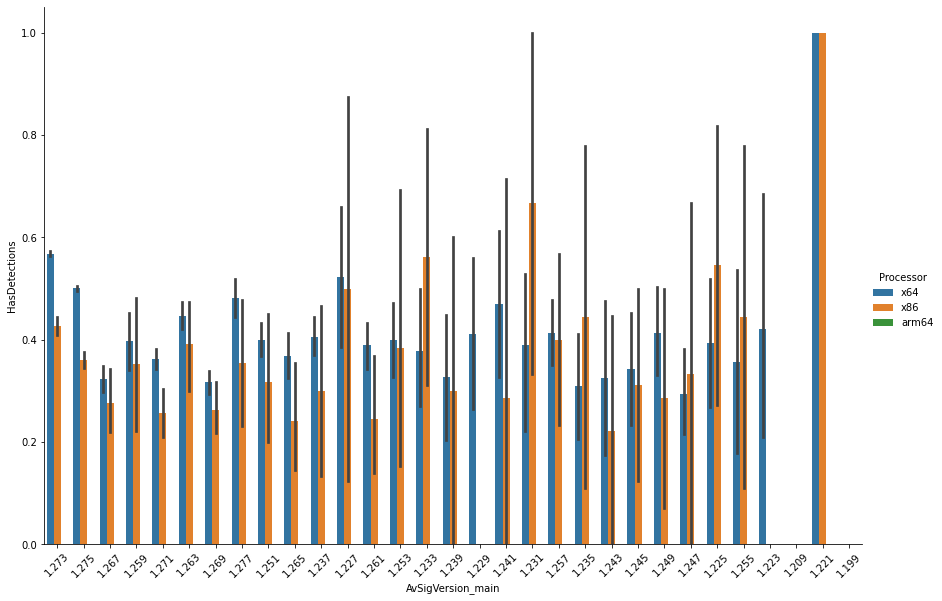

In [121]:
ax = sns.catplot(x='AvSigVersion_main', 
                 y='HasDetections', 
                 kind='bar',
                 hue='Processor',
                 height=8, 
                 aspect=1.5,
                 data=df)
ax.set_xticklabels(rotation=45)

In [138]:
num_col = [col for col in df.columns.tolist() if col not in cat_col]
num_col_df = df[num_col]
num_col_df.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,12202.0,2.0,1.0,1,51,49048.0,27.0,...,556.0,64793.0,1,0.0,0,0,0.0,0.0,6.0,1
1,0,7.0,0,53447.0,1.0,1.0,1,60,86819.0,NaN,...,142.0,51066.0,0,0.0,0,0,0.0,1.0,15.0,1
2,0,7.0,0,53447.0,1.0,1.0,1,149,62544.0,27.0,...,142.0,7145.0,0,0.0,0,0,0.0,0.0,15.0,1
3,0,7.0,0,53447.0,1.0,1.0,1,171,151013.0,18.0,...,142.0,52458.0,0,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,53447.0,1.0,1.0,1,93,85408.0,27.0,...,628.0,50319.0,0,0.0,0,0,0.0,1.0,8.0,0


In [156]:
num_col_df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,89214.0,1.120900e-05,3.347985e-03,0.0,0.0,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,88884.0,6.840095e+00,1.041667e+00,0.0,7.0,7.0,7.000000e+00,8.000000e+00
IsSxsPassiveMode,89214.0,1.796803e-02,1.328359e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
AVProductStatesIdentifier,88837.0,4.781517e+04,1.405143e+04,16.0,49480.0,53447.0,5.344700e+04,7.048600e+04
AVProductsInstalled,88837.0,1.330223e+00,5.249696e-01,1.0,1.0,1.0,2.000000e+00,6.000000e+00
AVProductsEnabled,88837.0,1.020645e+00,1.693624e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,89214.0,9.881969e-01,1.079995e-01,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,89214.0,1.081702e+02,6.310598e+01,1.0,51.0,97.0,1.630000e+02,2.220000e+02
CityIdentifier,85986.0,8.110064e+04,4.895378e+04,7.0,36825.0,82373.0,1.235820e+05,1.679530e+05
OrganizationIdentifier,61451.0,2.487058e+01,5.593789e+00,1.0,18.0,27.0,2.700000e+01,5.200000e+01


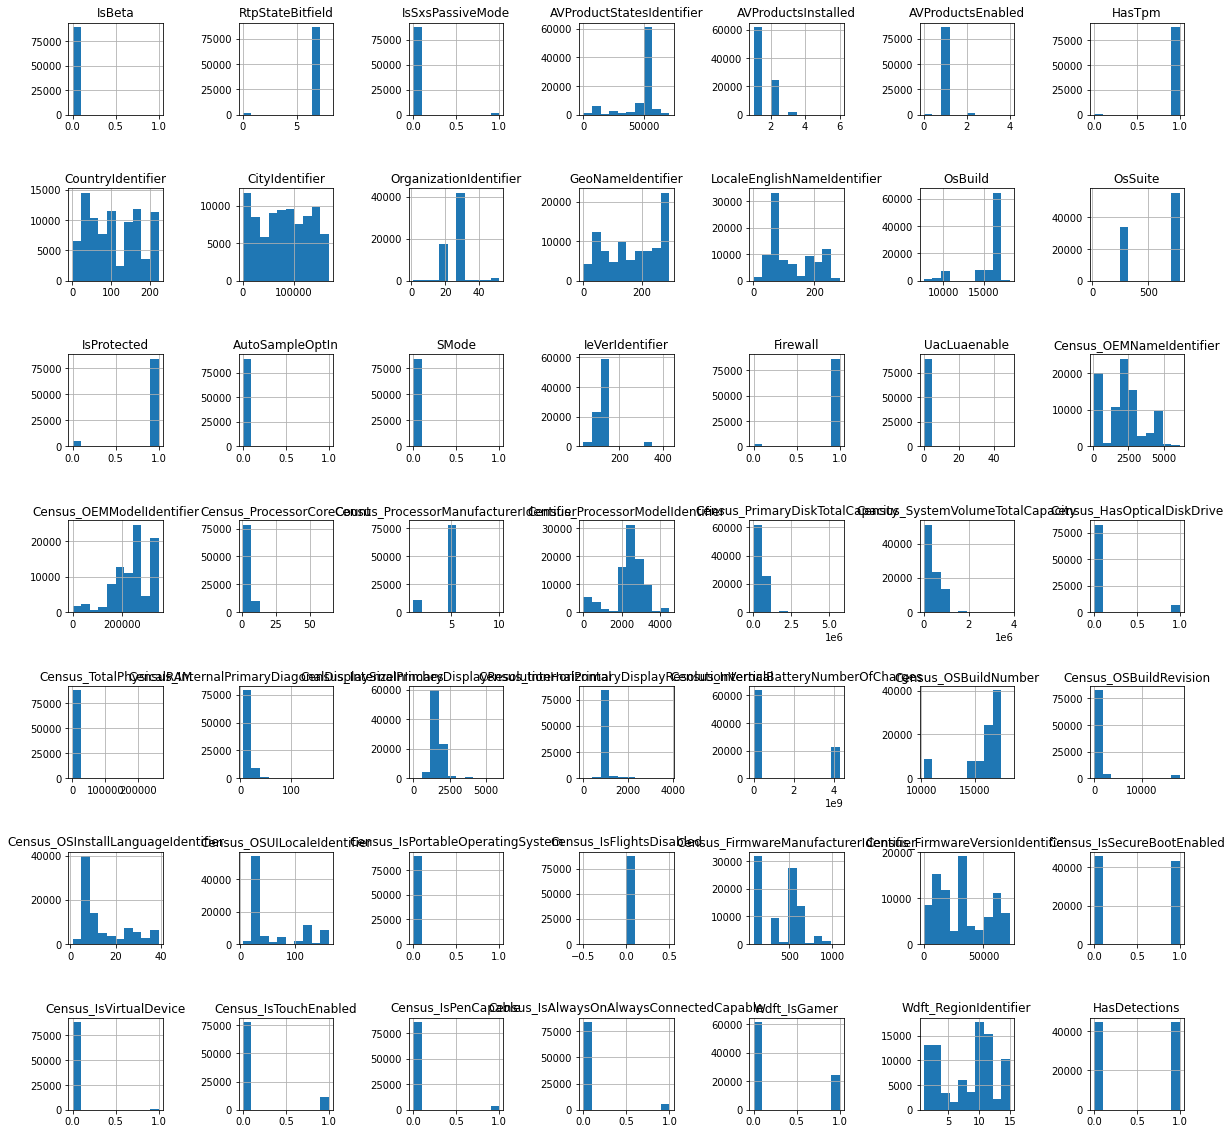

In [165]:
num_col_df.hist(figsize=(20, 20))
plt.subplots_adjust(hspace=.8, wspace=.8);

In [ ]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }